# ⚠️ Seed Inventory Risk Analysis with Simulated Shortages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the adjusted risk dataset
df = pd.read_csv("../data/seed_demand_inventory_consolidated_risk.csv", parse_dates=["Date"])
df.head()

,Date,Virus,Amps,Inventory,Cumulative_Amps_Used,Remaining_Inventory,Shortage
0,2025-05-01,MFB,492,72526,492,72034,False
1,2025-06-01,MFB,643,72526,1135,71391,False
2,2025-07-01,MFB,445,72526,1580,70946,False
3,2025-08-01,MFB,429,72526,2009,70517,False
4,2025-09-01,MFB,423,72526,2432,70094,False


## 📉 Remaining Inventory Over Time by Virus

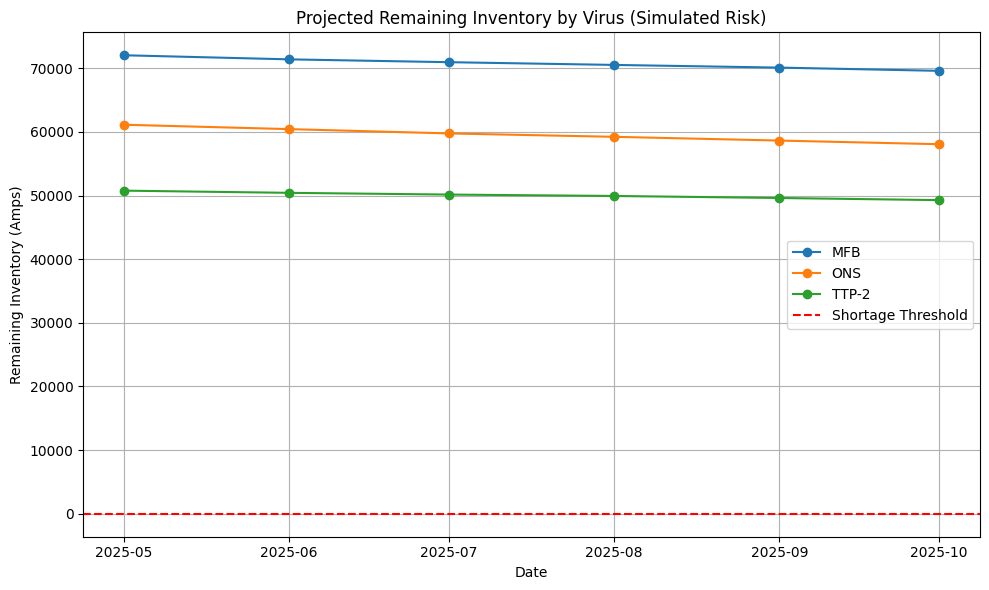

In [2]:
plt.figure(figsize=(10, 6))
for virus in df['Virus'].unique():
    subset = df[df['Virus'] == virus]
    plt.plot(subset['Date'], subset['Remaining_Inventory'], marker='o', label=virus)

plt.axhline(0, color='red', linestyle='--', label='Shortage Threshold')
plt.title("Projected Remaining Inventory by Virus (Simulated Risk)")
plt.xlabel("Date")
plt.ylabel("Remaining Inventory (Amps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🚨 First Forecasted Shortage Date by Virus

In [3]:
shortages = df[df['Shortage'] == True].copy()

if shortages.empty:
    print("🎉 No forecasted shortages at this time.")
else:
    first_shortage = shortages.groupby('Virus')['Date'].min().reset_index().sort_values('Date')

    plt.figure(figsize=(8, 5))
    sns.barplot(data=first_shortage, y='Virus', x='Date', palette='Reds_r')
    plt.title("First Forecasted Shortage Date by Virus")
    plt.xlabel("Date of Shortage")
    plt.ylabel("Virus Strain")
    plt.tight_layout()
    plt.show()

🎉 No forecasted shortages at this time.
